In [30]:
import pandas as pd

import glob
import datetime

from matplotlib import pyplot as plt
# plt.style.use('dark_background')

user input

In [31]:
start_time = datetime.time(6, 0)
end_time   = datetime.time(18, 0)

load all files

In [32]:
files = glob.glob('.\\data\\*.csv')

data_set = []
for file in files:
    data = pd.read_csv(file, header=1, sep=';', decimal=',')

    data['Datum/Uhrzeit'] = pd.to_datetime(data['Datum/Uhrzeit'], format='%H:%M', errors='coerce').dt.time

    name = file.split('_')[0][-8:]
    name = name[-2:] + '.' + name[4:6] + '.' + name[:4]


    data[name] = data['Verbrauchswert'] / 0.25 # energy is in Wh per 15 minutes = 0.25 hours

    data = data[['Datum/Uhrzeit',name]]    # retain only relevant columns

    data_set.append(data)

merge all data sets

In [33]:
power = data_set[0]
for i in range(1, len(data_set)):
    power = power.merge(data_set[i], on='Datum/Uhrzeit')

filter time

In [34]:
power = power[power['Datum/Uhrzeit'].between(start_time, end_time)]

clean up index

In [35]:
power['Datum/Uhrzeit'] = power['Datum/Uhrzeit'].apply(
    lambda t: datetime.datetime.combine(datetime.date.today(), t) )

power.set_index('Datum/Uhrzeit', inplace=True)

statistics

In [36]:
power['median'] = power.median(axis=1)
power['min']    = power.min(axis=1)
power['max']    = power.max(axis=1)

plot power

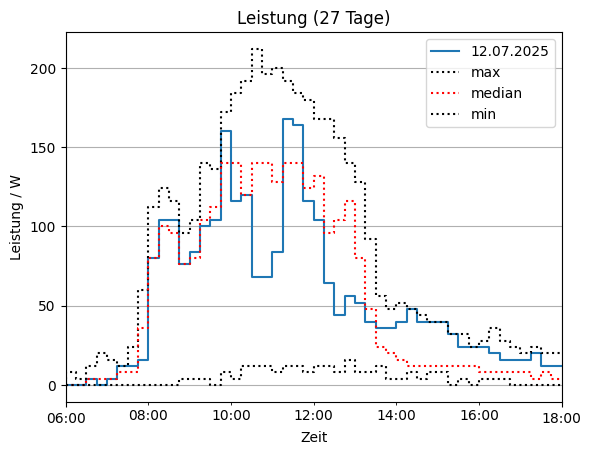

In [37]:
power.plot(y=[name,'max','median','min'], style=['-','k:','r:','k:'], drawstyle='steps-pre', 
           title=f'Leistung ({len(data_set)} Tage)', ylabel='Leistung / W', xlabel='Zeit', grid=True)
plt.show()

# power.plot(drawstyle='steps-pre', title='power generation of solar plant', ylabel='power', xlabel='time')
# plt.gca().set_yticks([])
# plt.savefig('power_generation.png', dpi=300, bbox_inches='tight', transparent=True)

energy

In [38]:
energy = power.cumsum() * 0.25  # convert to Wh
energy = energy.iloc[-1,:-3]
energy.index = pd.to_datetime(energy.index, format='%d.%m.%Y').date

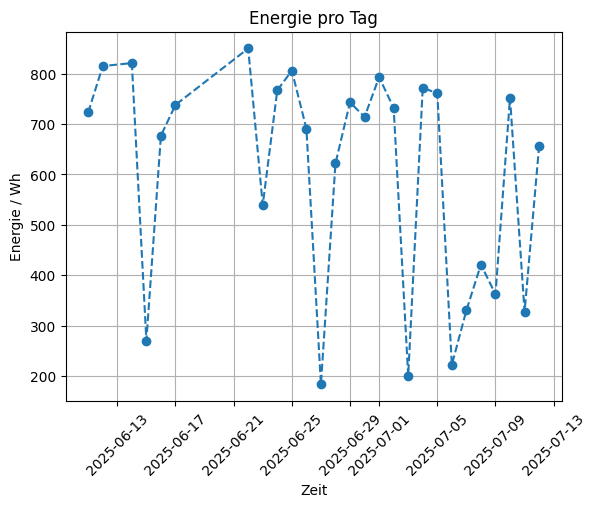

In [39]:
energy.plot(style = 'o--', title='Energie pro Tag', ylabel='Energie / Wh', xlabel='Zeit', rot=45, grid=True)
plt.show()